## 📊 Minimal Mastery Assessment - 掌握度等级分布分析


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置显示选项
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.width', None)

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

print("✅ 导入成功")


✅ 导入成功


In [11]:
# 读取 minimal mastery assessment 结果
df_minimal = pd.read_csv('mastery_assessment_results_minimal_qwen-plus.csv')

# 清理 mastery_level 字段，去掉可能存在的星号和多余空格
df_minimal['mastery_level'] = df_minimal['mastery_level'].str.replace('*', '').str.strip()

print(f"✅ 数据加载成功")
print(f"   • 总记录数: {len(df_minimal):,}")
print(f"   • 学生数量: {df_minimal['student_id'].nunique():,}")
print(f"   • 知识点数量: {df_minimal['kc_name'].nunique():,}")
print(f"\n前5行数据预览:")
df_minimal.head()


✅ 数据加载成功
   • 总记录数: 141,656
   • 学生数量: 1,140
   • 知识点数量: 93

前5行数据预览:


,student_id,kc_name,mastery_level,rationale,suggestions,llm_raw_response,prompt_system,prompt_user
0,1,Cardinality,Novice,The student demonstrated limited understanding of the 'Cardinality' knowledge component. In Ques...,The student should review the definition of cardinality and practice identifying elements of sim...,Mastery Level: Novice\n\nRationale: The student demonstrated limited understanding of the 'Cardi...,You are an experienced educational assessment expert. Your task is to evaluate a student's maste...,--- ASSESSMENT CONTEXT ---\nStudent ID: 1\nKnowledge Component: 'Cardinality'\nDescription: the ...
1,11,Join,Developing,"The student correctly answered one question on the 'Join' knowledge component by selecting ""Join...","To strengthen understanding, the student should practice with multi-step problems involving actu...",Mastery Level: Developing\n\nRationale: The student correctly answered one question on the 'Join...,You are an experienced educational assessment expert. Your task is to evaluate a student's maste...,--- ASSESSMENT CONTEXT ---\nStudent ID: 11\nKnowledge Component: 'Join'\nDescription: When we wa...
2,1,Concurrent Transactions,Mastered,"The student has answered all six questions correctly, demonstrating a comprehensive and consiste...","Given the student’s demonstrated mastery, they are well-prepared to advance to more advanced top...","Mastery Level: Mastered\n\nRationale: The student has answered all six questions correctly, demo...",You are an experienced educational assessment expert. Your task is to evaluate a student's maste...,--- ASSESSMENT CONTEXT ---\nStudent ID: 1\nKnowledge Component: 'Concurrent Transactions'\nDescr...
3,1,Transactions,Mastered,The student demonstrated comprehensive and consistent understanding of the 'Transactions' knowle...,"Continue to reinforce expertise by exploring advanced topics such as distributed transactions, o...",Mastery Level: Mastered\n\nRationale: The student demonstrated comprehensive and consistent unde...,You are an experienced educational assessment expert. Your task is to evaluate a student's maste...,--- ASSESSMENT CONTEXT ---\nStudent ID: 1\nKnowledge Component: 'Transactions'\nDescription: A t...
4,11,Attribute,Developing,The student correctly answered one question regarding the definition of an attribute in the rela...,"To deepen understanding, the student should engage with more complex problems involving attribut...",Mastery Level: Developing\n\nRationale: The student correctly answered one question regarding th...,You are an experienced educational assessment expert. Your task is to evaluate a student's maste...,--- ASSESSMENT CONTEXT ---\nStudent ID: 11\nKnowledge Component: 'Attribute'\nDescription: Attri...



📊 整体掌握度等级分布

掌握度等级统计:
  • Developing        48,050 条  (33.92%)
  • Mastered          18,262 条  (12.89%)
  • Novice            18,328 条  (12.94%)
  • Proficient        57,016 条  (40.25%)

✅ 图片已保存到: ../pictures/mastery_level_distribution_minimal_assessment.png


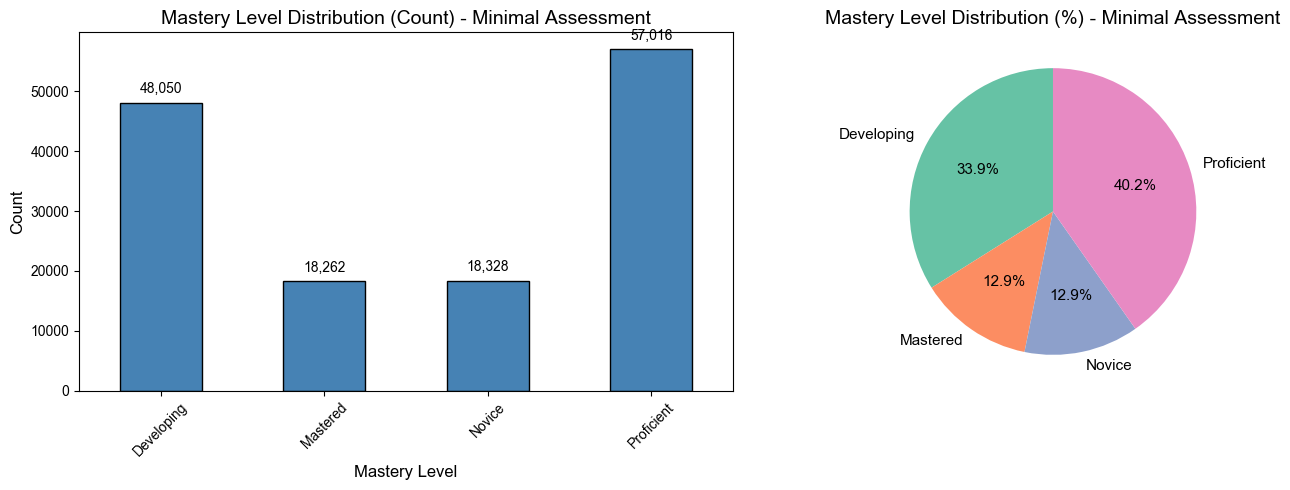

In [12]:
# 整体掌握度等级分布
print("\n" + "="*80)
print("📊 整体掌握度等级分布")
print("="*80)

mastery_counts = df_minimal['mastery_level'].value_counts().sort_index()
mastery_pct = (df_minimal['mastery_level'].value_counts(normalize=True) * 100).sort_index()

print("\n掌握度等级统计:")
for level in mastery_counts.index:
    count = mastery_counts[level]
    pct = mastery_pct[level]
    print(f"  • {level:<15} {count:>8,} 条  ({pct:>5.2f}%)")

# 可视化
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 柱状图
ax1 = axes[0]
mastery_counts.plot(kind='bar', ax=ax1, color='steelblue', edgecolor='black')
ax1.set_title('Mastery Level Distribution (Count) - Minimal Assessment', fontsize=14, fontweight='bold')
ax1.set_xlabel('Mastery Level', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
for i, v in enumerate(mastery_counts.values):
    ax1.text(i, v + max(mastery_counts.values)*0.02, f'{v:,}', ha='center', va='bottom', fontsize=10)

# 饼图
ax2 = axes[1]
colors = sns.color_palette("Set2", len(mastery_counts))
ax2.pie(mastery_counts.values, labels=mastery_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=colors, textprops={'fontsize': 11})
ax2.set_title('Mastery Level Distribution (%) - Minimal Assessment', fontsize=14, fontweight='bold')

plt.tight_layout()

# 保存图片到 pictures 文件夹
save_path = '../pictures/mastery_level_distribution_minimal_assessment.png'
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"\n✅ 图片已保存到: {save_path}")

plt.show()



📊 各知识点的掌握度分布 (Top 20)

前20个知识点的掌握度分布 (%):
mastery_level                       Developing  Mastered  Novice  Proficient
kc_name                                                                     
Cartesian product                        11.40     21.65    0.57       66.38
union                                     8.05     29.19    1.94       60.81
Difference                                8.43     40.98    2.06       48.53
Intersection                              6.41     36.11    4.78       52.70
Set                                      12.92      0.00   42.97       44.10
Superkey                                  6.36     48.36    0.42       44.86
Relation                                  5.86     45.26    3.19       45.69
Cardinality                              18.36     64.46    0.85       16.33
Candidate key                             5.72     46.54    0.65       47.08
Attribute                                10.34     46.25    1.09       42.33
Equality                         

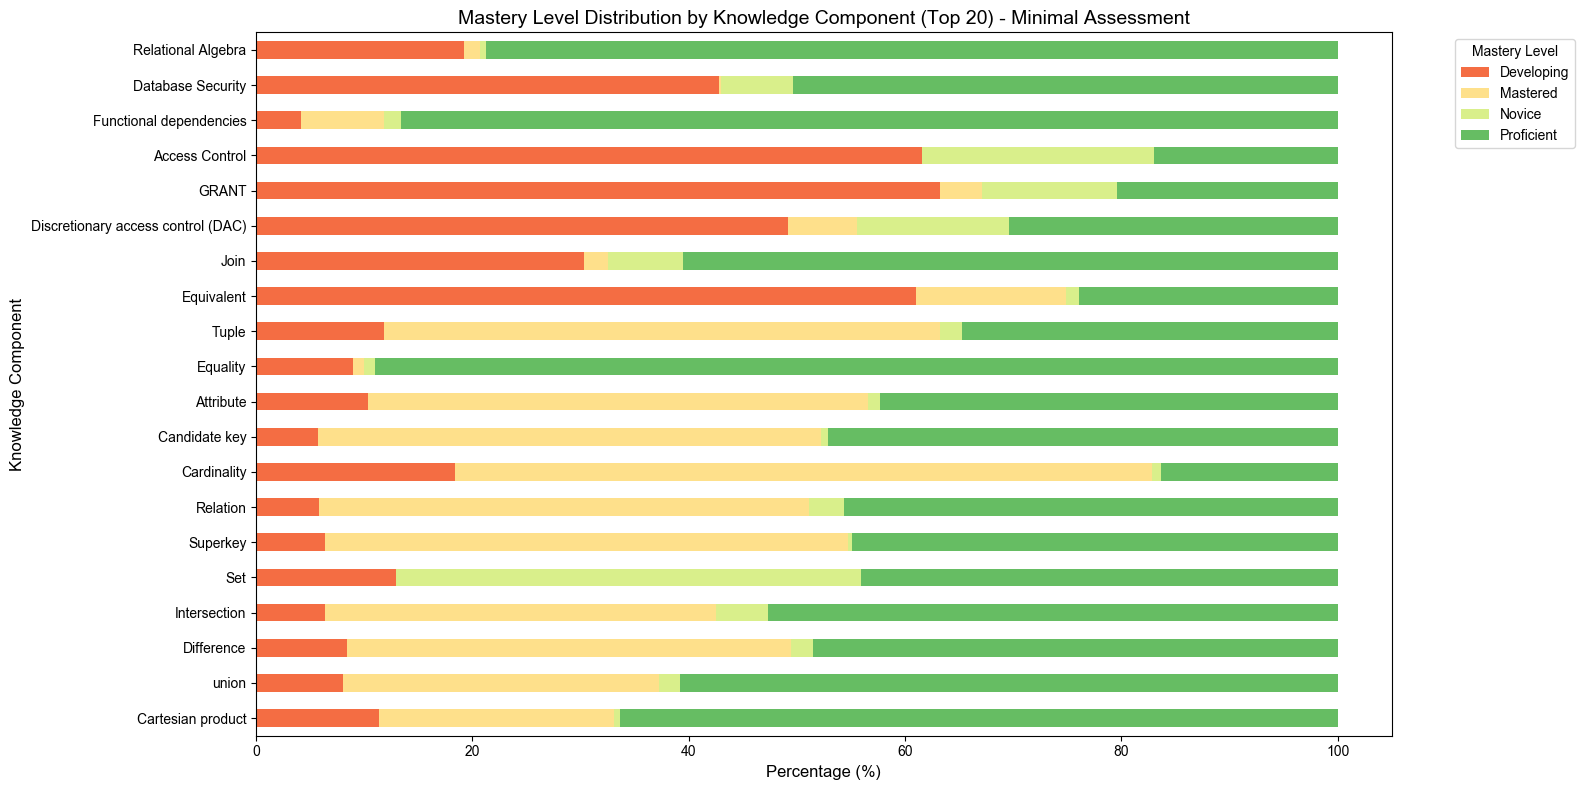

In [13]:
# 各知识点的掌握度分布 (Top 20)
print("\n" + "="*80)
print("📊 各知识点的掌握度分布 (Top 20)")
print("="*80)

# 统计每个知识点的掌握度分布
kc_mastery = pd.crosstab(df_minimal['kc_name'], df_minimal['mastery_level'], normalize='index') * 100
kc_counts = df_minimal['kc_name'].value_counts()

# 选择样本数最多的前20个知识点
top_kcs = kc_counts.head(20).index
kc_mastery_top = kc_mastery.loc[top_kcs]

print(f"\n前20个知识点的掌握度分布 (%):")
print(kc_mastery_top.round(2).to_string())

# 可视化 - 堆叠柱状图
fig, ax = plt.subplots(figsize=(16, 8))
kc_mastery_top.plot(kind='barh', stacked=True, ax=ax, 
                     color=sns.color_palette("RdYlGn", len(kc_mastery_top.columns)))
ax.set_title('Mastery Level Distribution by Knowledge Component (Top 20) - Minimal Assessment', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Percentage (%)', fontsize=12)
ax.set_ylabel('Knowledge Component', fontsize=12)
ax.legend(title='Mastery Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# 保存图片到 pictures 文件夹
save_path = '../pictures/mastery_level_by_kc_minimal_assessment.png'
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"\n✅ 图片已保存到: {save_path}")

plt.show()
